# 💳 Credit Card Default Prediction Project

This end-to-end project explores how we can predict whether a customer is likely to default on their credit card payment next month.

We use real-world financial and behavioral data — including past bill amounts, repayments, credit limits, and demographics — to uncover hidden patterns that drive default risk.

Our pipeline includes:
- 🔍 Cleaning and preprocessing raw banking data
- 📊 Deep exploratory analysis of user behavior
- 🧠 Feature engineering to extract key risk signals
- 🤖 Machine learning models to predict default probabilities
- 🧪 Simulated offer testing to evaluate business impact

By the end, we’ll not only predict default but also simulate marketing decisions — enabling smarter risk mitigation and personalized offers.

## 🧹 Loading, Data Cleaning & Preprocessing

Before jumping into analysis or modeling, we need to clean and prep the dataset.  
We'll fix messy column names, decode weird categorical values, and ensure the data is readable, consistent, and ready for analysis.  
This step sets the foundation — clean data = clean insights.


**📦 Import Required Libraries**

We begin by importing the libraries necessary for data handling, analysis, and visualization.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

**📥 Loading the Credit Default Dataset**

This dataset holds 30,000 records of credit card clients, and our goal is to figure out who might default next month.

> But before we start casting models, we need to understand what we’re working with.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/default of credit card clients.csv')

print('Data Overview:')
df.info()
print("Duplicates:",df.duplicated().sum())
df.head(10)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  in

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


**✍️ Renaming Columns to Be easy to understand**

Right now, these column names are not easily understandable.

We're gonna rename columns to make them readable.  
Example: `PAY_0` → `PAY_SEPT`, `SEX` → `GENDER`, `LIMIT_BAL` → `CREDIT_LIMIT`, etc.

> This also reduces confusion when sharing this with others or when you revisit it in 6 months.

In [ ]:
# Renaming for readability
df.rename(columns={
    'LIMIT_BAL': 'CREDIT_LIMIT',
    'SEX': 'GENDER',
    'EDUCATION': 'EDUCATION_LEVEL',
    'MARRIAGE': 'MARITAL_STATUS',
    'PAY_0': 'PAY_SEPT',
    'PAY_2': 'PAY_AUG',
    'PAY_3': 'PAY_JULY',
    'PAY_4': 'PAY_JUNE',
    'PAY_5': 'PAY_MAY',
    'PAY_6': 'PAY_APRIL',
    'BILL_AMT1': 'BILL_SEPT',
    'BILL_AMT2': 'BILL_AUG',
    'BILL_AMT3': 'BILL_JULY',
    'BILL_AMT4': 'BILL_JUNE',
    'BILL_AMT5': 'BILL_MAY',
    'BILL_AMT6': 'BILL_APRIL',
    'PAY_AMT1': 'PAID_SEPT',
    'PAY_AMT2': 'PAID_AUG',
    'PAY_AMT3': 'PAID_JULY',
    'PAY_AMT4': 'PAID_JUNE',
    'PAY_AMT5': 'PAID_MAY',
    'PAY_AMT6': 'PAID_APRIL',
    'default payment next month': 'DEFAULT_NEXT_MONTH'
}, inplace=True)

df.columns


Index(['ID', 'CREDIT_LIMIT', 'GENDER', 'EDUCATION_LEVEL', 'MARITAL_STATUS',
       'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY',
       'PAY_APRIL', 'BILL_SEPT', 'BILL_AUG', 'BILL_JULY', 'BILL_JUNE',
       'BILL_MAY', 'BILL_APRIL', 'PAID_SEPT', 'PAID_AUG', 'PAID_JULY',
       'PAID_JUNE', 'PAID_MAY', 'PAID_APRIL', 'DEFAULT_NEXT_MONTH'],
      dtype='object')

**🧠 Understanding the Categorical Codes**

Before we do any charts or modeling, we gotta make sense of these numbers.

We'll use `.value_counts()` to look at unique values for:
>- GENDER
- EDUCATION_LEVEL
- MARITAL_STATUS
- PAY_SEPT to PAY_APRIL


In [ ]:
# Let's inspect all the categorical variables
print( df['GENDER'].value_counts(), "\n")
print(df['EDUCATION_LEVEL'].value_counts(), "\n")
print(df['MARITAL_STATUS'].value_counts(), "\n")

# Check unique values across all PAY_* columns
pay_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL']
for col in pay_cols:
    print(f"{df[col].value_counts().sort_index()}\n")


GENDER
2    18112
1    11888
Name: count, dtype: int64 

EDUCATION_LEVEL
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64 

MARITAL_STATUS
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64 

PAY_SEPT
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

PAY_AUG
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64

PAY_JULY
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64

PAY_JUNE
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: count, dtype: int64

PAY_MAY
-2     4546
-1     5539
 0    16947
 2     2626
 3      

**🔧 Cleaning & Mapping Categorical Features**

We'll:
- Map `GENDER` into 'Male' and 'Female' instead of '0' & '1'
- Group weird `EDUCATION_LEVEL` values (0, 4, 5, 6) into "Other"
- Leave `MARITAL_STATUS` as-is but rename the categories


In [ ]:
# Map GENDER
df['GENDER'] = df['GENDER'].map({1: 'Male', 2: 'Female'})

# Group EDUCATION
df['EDUCATION_LEVEL'] = df['EDUCATION_LEVEL'].replace({0: 4, 5: 4, 6: 4})  # grouping to 4
edu_map = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Other'
}
df['EDUCATION_LEVEL'] = df['EDUCATION_LEVEL'].map(edu_map)

# Map MARITAL_STATUS
marital_map = {
    0: 'Unknown',
    1: 'Married',
    2: 'Single',
    3: 'Others'
}
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].map(marital_map)

df.head()

,ID,CREDIT_LIMIT,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_JUNE,BILL_MAY,BILL_APRIL,PAID_SEPT,PAID_AUG,PAID_JULY,PAID_JUNE,PAID_MAY,PAID_APRIL,DEFAULT_NEXT_MONTH
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 📊 Exploratory Data Analysis (EDA):
The goal of EDA is to surface patterns, outliers, and relationships that may influence whether a customer defaults on their credit.

In this section, we explore:

>🧍‍♂️ Default distribution — how many customers defaulted vs. didn't  
>🧠 Categorical features — such as Gender, Education, and Marital Status
>📈 Continuous features — like Age, Credit Limit, Bill Amounts, and Payment Amounts  
>🕒 Monthly repayment status — using the PAY_* features (past 6 months)
>🔗 Correlation matrix — to detect relationships among financial and behavioral features.  
>📊 Visuals — histograms, boxplots, and trend comparisons between defaulters and non-defaulters

By exploring these aspects, we build intuition about what factors are associated with credit risk, which helps guide our feature engineering and modeling decisions later on.

**🎯 Default Distribution**

Quick glance at overall imbalance — how many users defaulted vs didn’t.

`0 = No Default`, `1 = Default`


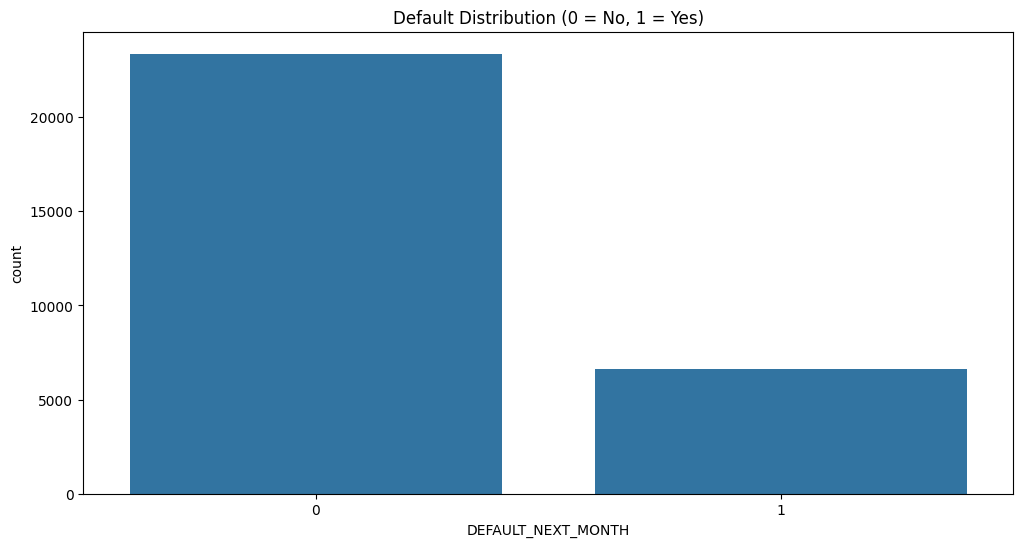

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='DEFAULT_NEXT_MONTH', data=df)
plt.title('Default Distribution (0 = No, 1 = Yes)')
plt.show()


**👩‍🦰 Gender vs Default**

Let’s see if men/women default more often. Any pattern worth noting?


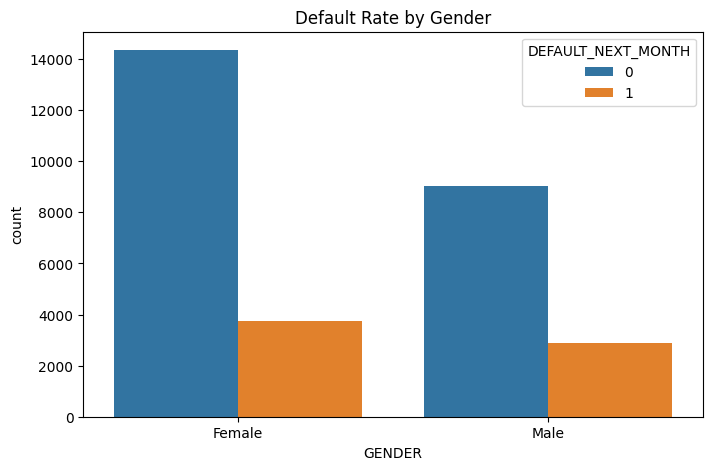

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='GENDER', hue='DEFAULT_NEXT_MONTH', data=df)
plt.title('Default Rate by Gender')
plt.show()

**🎓 Education vs Default**

Checking if educational background affects chances of default.


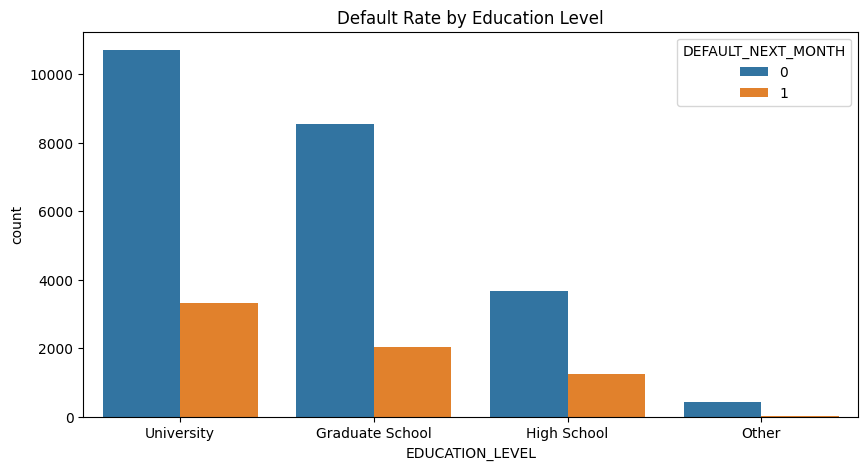

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='EDUCATION_LEVEL', hue='DEFAULT_NEXT_MONTH', data=df)
plt.title('Default Rate by Education Level')
plt.show()


**💍 Marital Status vs Default**

Are single, married, or ‘other’ people more likely to default?


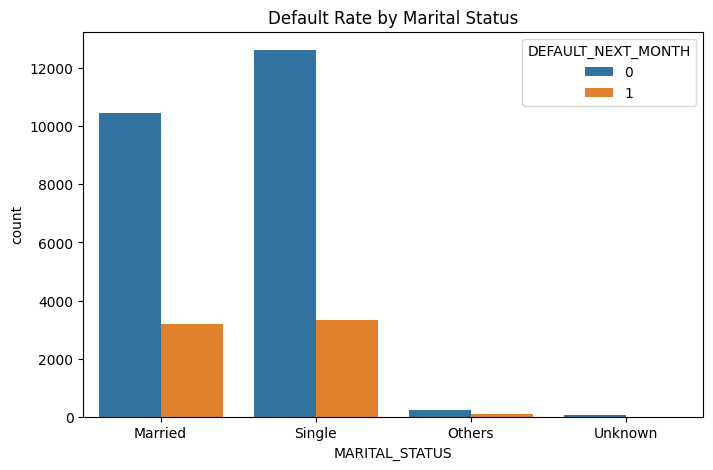

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='MARITAL_STATUS', hue='DEFAULT_NEXT_MONTH', data=df)
plt.title('Default Rate by Marital Status')
plt.show()

💳 Credit Limit vs Default

Explore if high or low credit limits show any pattern in defaults.


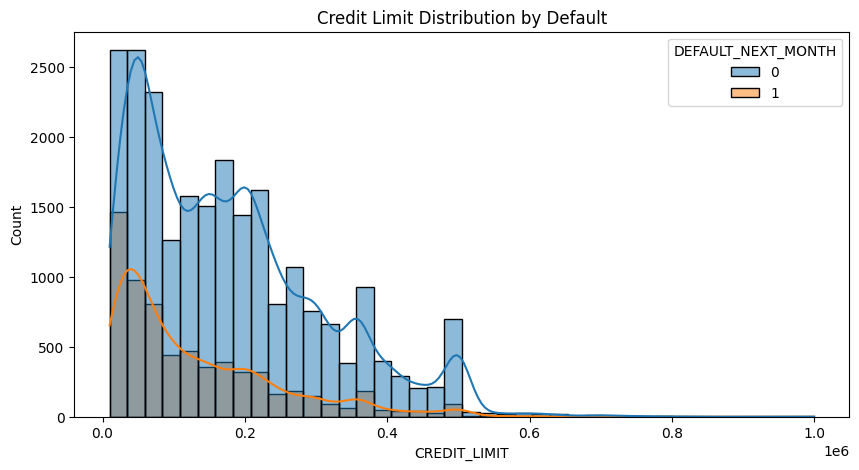

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='CREDIT_LIMIT', hue='DEFAULT_NEXT_MONTH', bins=40, kde=True)
plt.title('Credit Limit Distribution by Default')
plt.show()

**👶👴 Age vs Default**

Does default rate change with age? Younger = riskier?


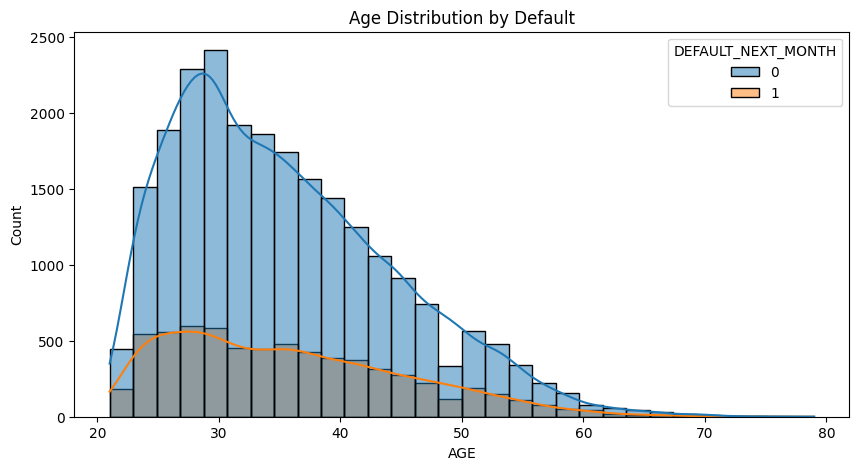

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='AGE', hue='DEFAULT_NEXT_MONTH', bins=30, kde=True)
plt.title('Age Distribution by Default')
plt.show()

**📦 Boxplots: Credit & Age vs Default**

Comparing distributions with boxplots — are there extreme values or trends?


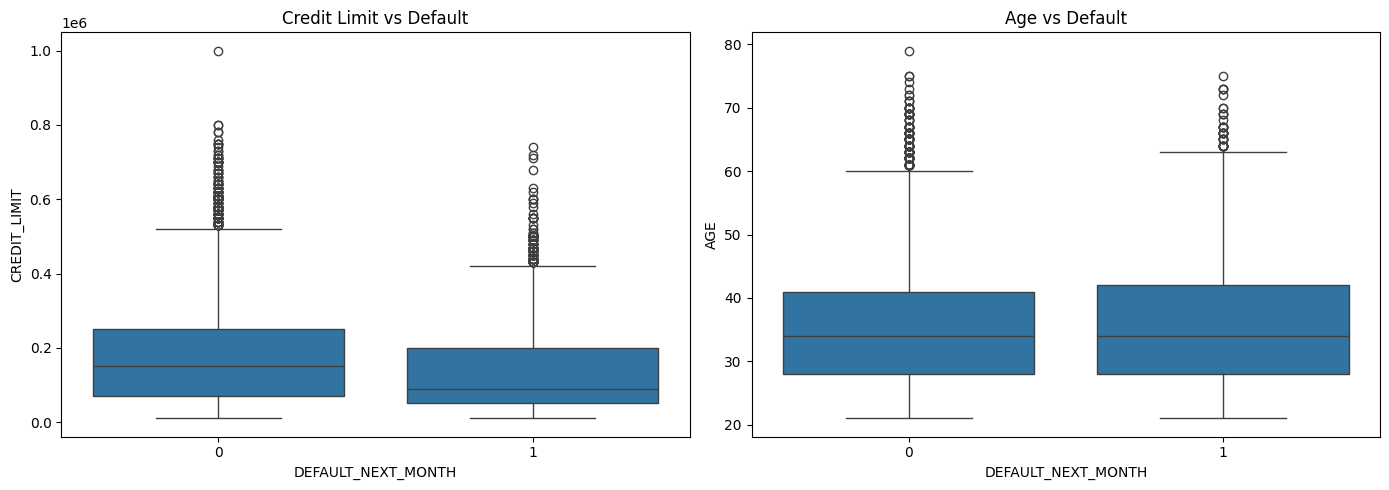

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x='DEFAULT_NEXT_MONTH', y='CREDIT_LIMIT', ax=axes[0])
axes[0].set_title('Credit Limit vs Default')
sns.boxplot(data=df, x='DEFAULT_NEXT_MONTH', y='AGE', ax=axes[1])
axes[1].set_title('Age vs Default')
plt.tight_layout()
plt.show()

**📆 Monthly PAY Status vs Default**

Looking at how payment status across months affects default behavior.


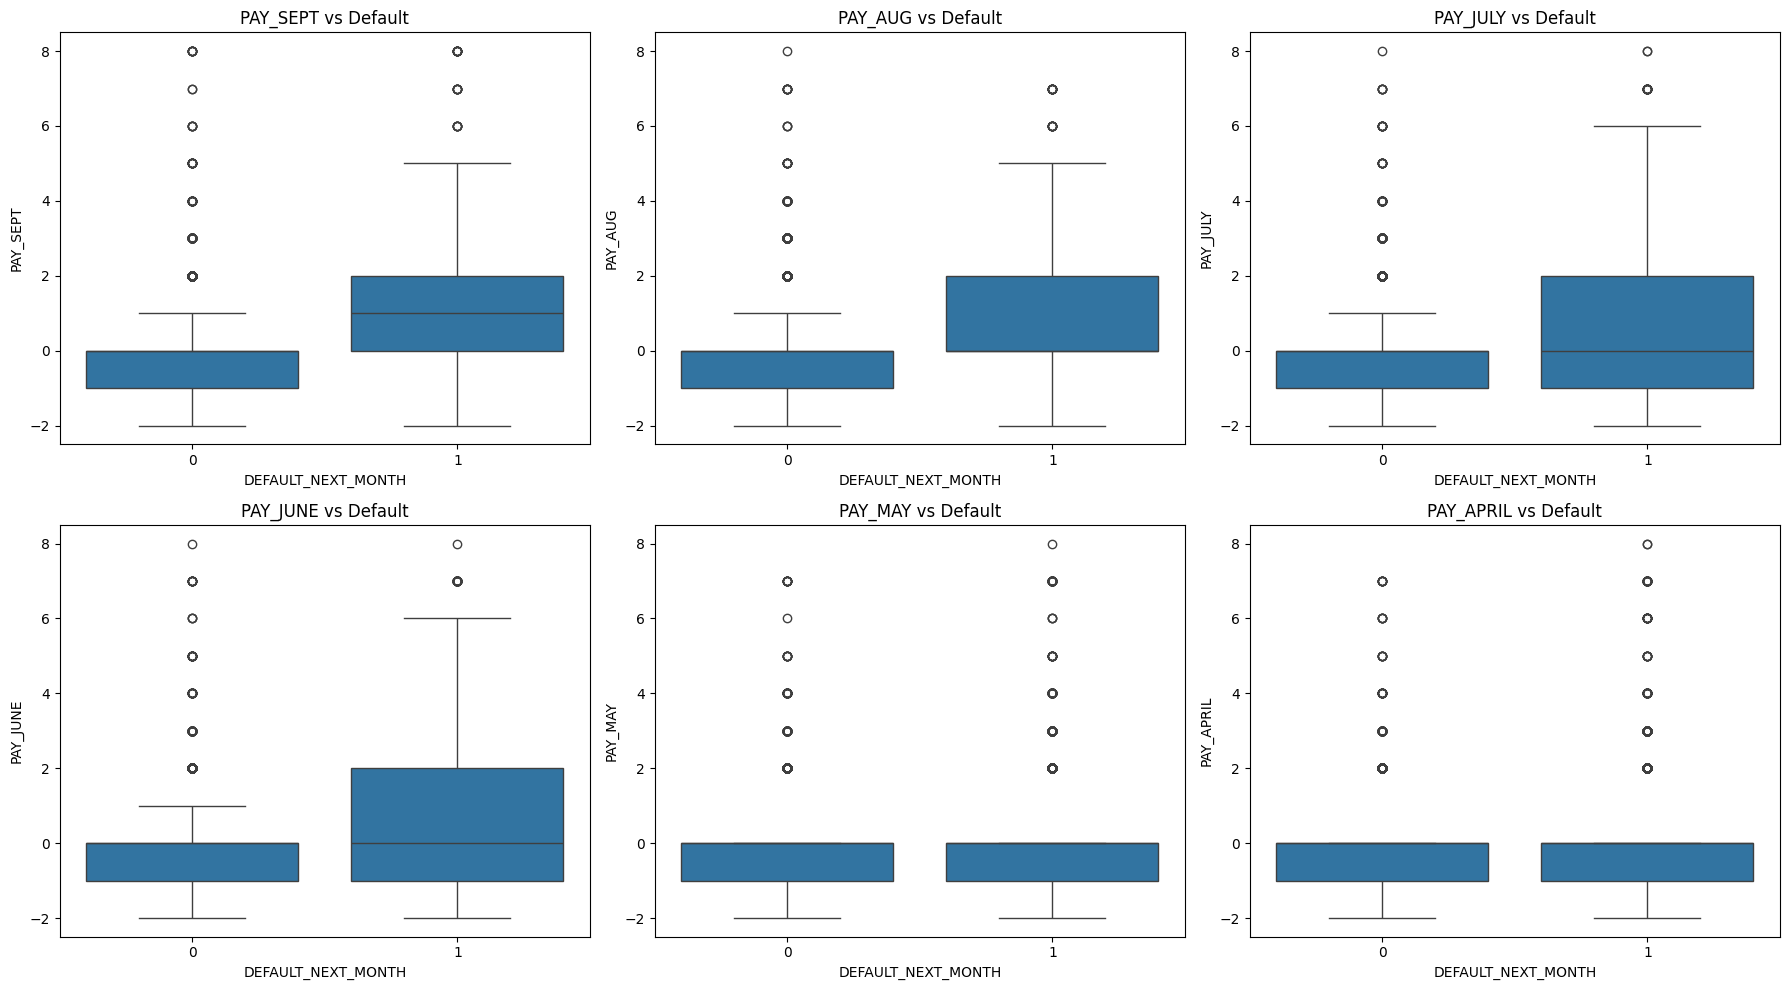

In [ ]:
pay_cols = [col for col in df.columns if 'PAY_' in col]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(pay_cols):
    sns.boxplot(data=df, x='DEFAULT_NEXT_MONTH', y=col, ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title(f'{col} vs Default')
plt.tight_layout()
plt.show()

**📈 Average PAY Trend (Defaulters vs Non-defaulters)**

Clear monthly pattern: defaulters have higher delay trends.


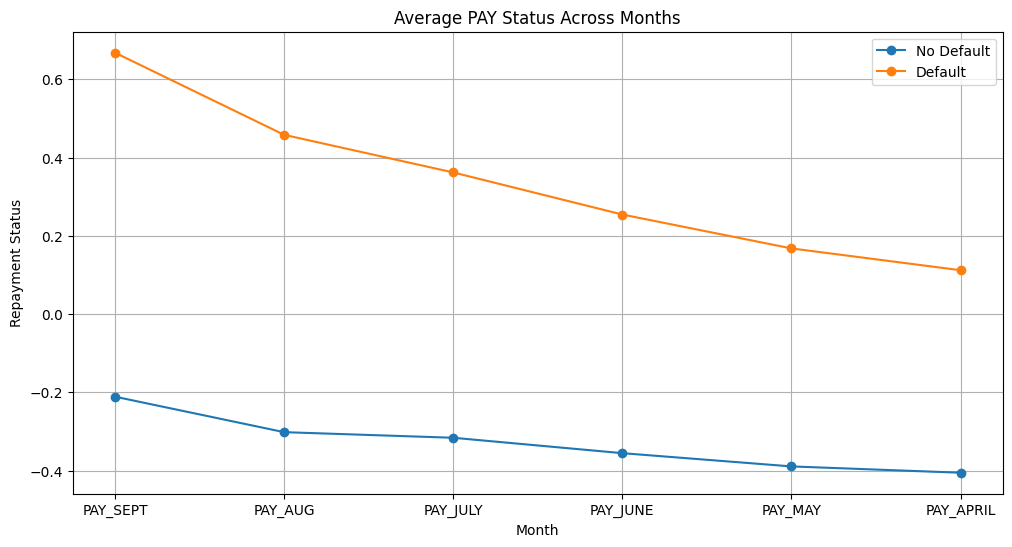

In [ ]:
pay_means = df.groupby('DEFAULT_NEXT_MONTH')[pay_cols].mean().T
pay_means.columns = ['No Default', 'Default']
pay_means.plot(figsize=(12, 6), marker='o', title='Average PAY Status Across Months')
plt.ylabel('Repayment Status')
plt.xlabel('Month')
plt.grid(True)
plt.show()

**💰 Bill vs Payment Boxplots**

Analyzing range/spread of bill and payment amounts across months.


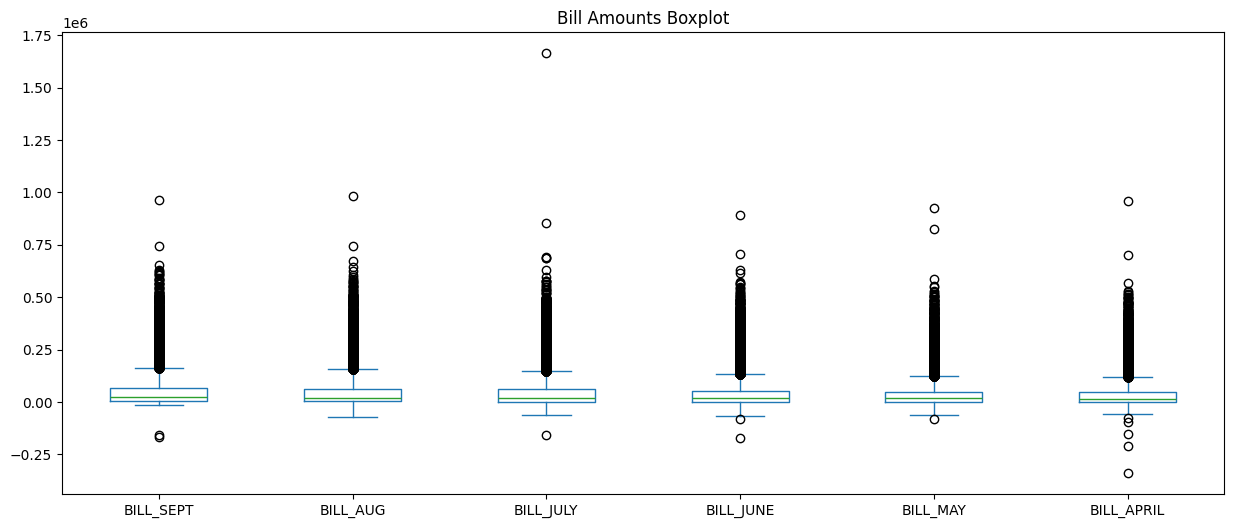

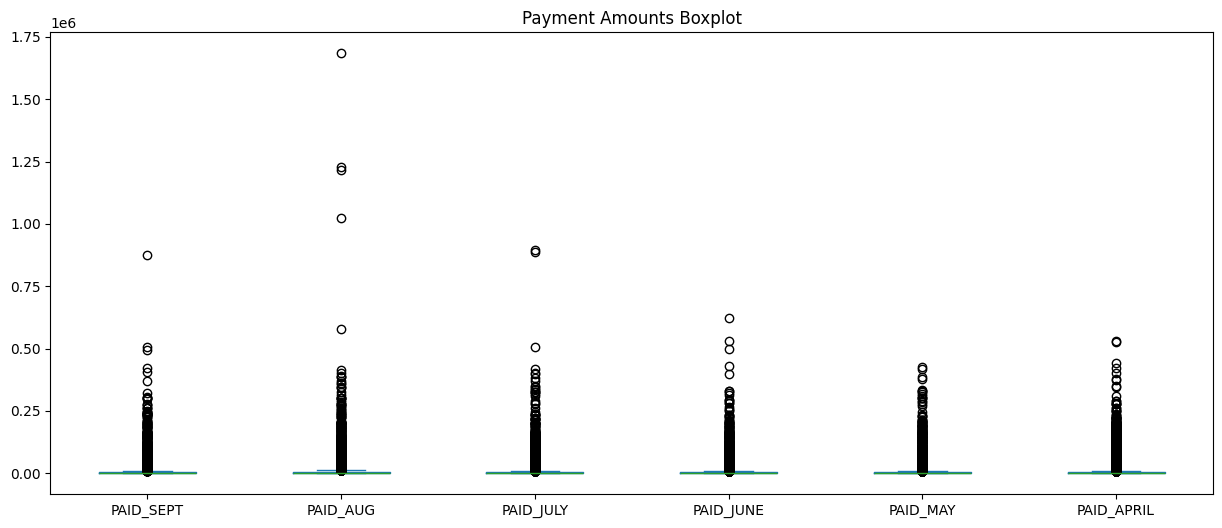

In [ ]:
bill_cols = [col for col in df.columns if 'BILL_' in col]
paid_cols = [col for col in df.columns if 'PAID_' in col]

df[bill_cols].plot(kind='box', figsize=(15, 6), title='Bill Amounts Boxplot')
plt.show()

df[paid_cols].plot(kind='box', figsize=(15, 6), title='Payment Amounts Boxplot')
plt.show()

**🔥 Correlation Heatmap: Financial Behavior vs Default**

We analyze how features like payment delay, billing, and age correlate with defaults.


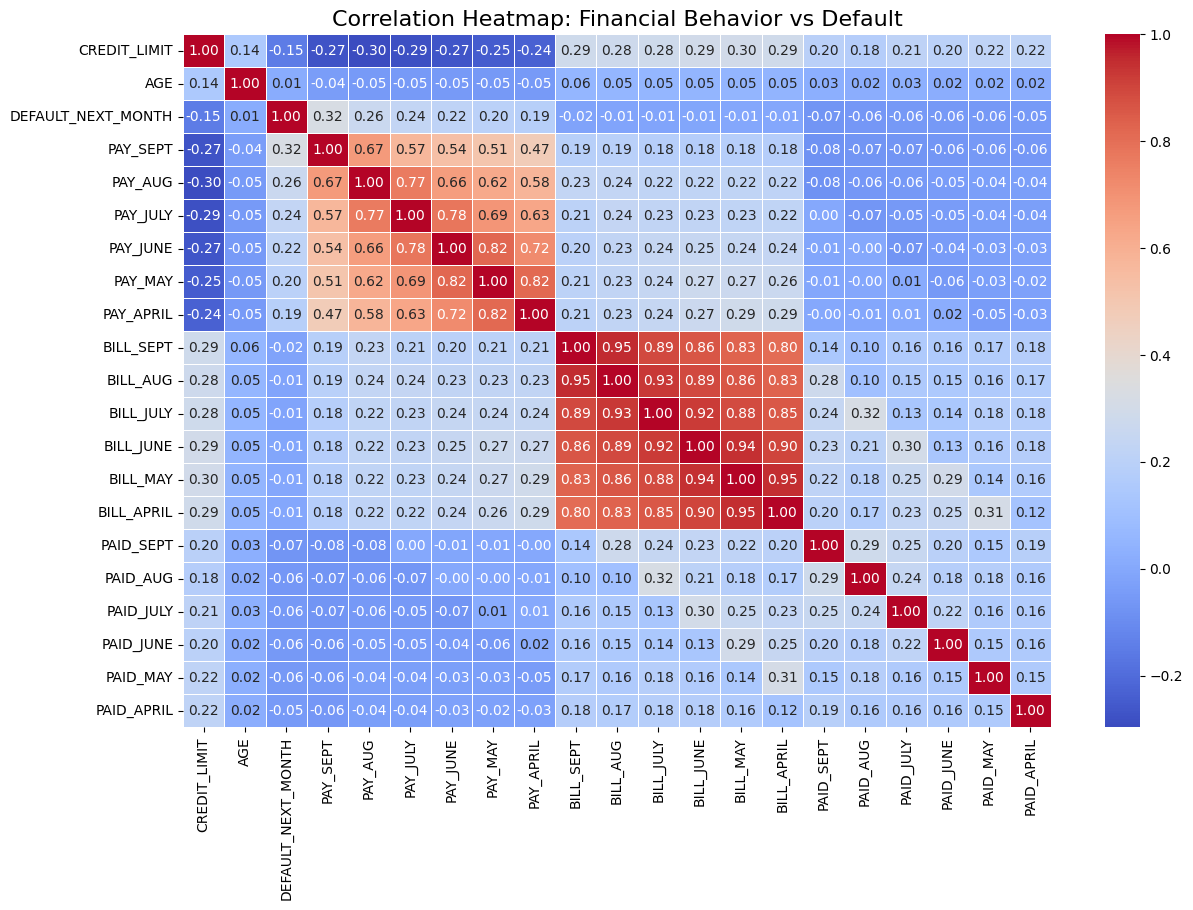

In [ ]:
corr_cols = df[['CREDIT_LIMIT', 'AGE', 'DEFAULT_NEXT_MONTH',
                'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL',
                'BILL_SEPT', 'BILL_AUG', 'BILL_JULY', 'BILL_JUNE', 'BILL_MAY', 'BILL_APRIL',
                'PAID_SEPT', 'PAID_AUG', 'PAID_JULY', 'PAID_JUNE', 'PAID_MAY', 'PAID_APRIL']]

corr_matrix = corr_cols.corr()

plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Financial Behavior vs Default", fontsize=16)
plt.show()


**📈 Distributions: Credit Limit & Age**

Univariate analysis to see how credit and age are spread across the dataset.


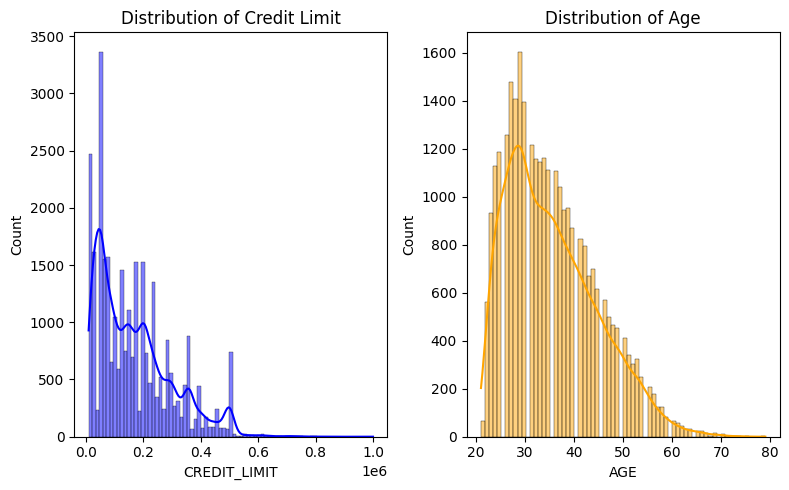

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
sns.histplot(df['CREDIT_LIMIT'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Credit Limit')

sns.histplot(df['AGE'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

**💸 Bill & Payment Boxplots**

Checking for outliers or skewness in bill and payment distributions.


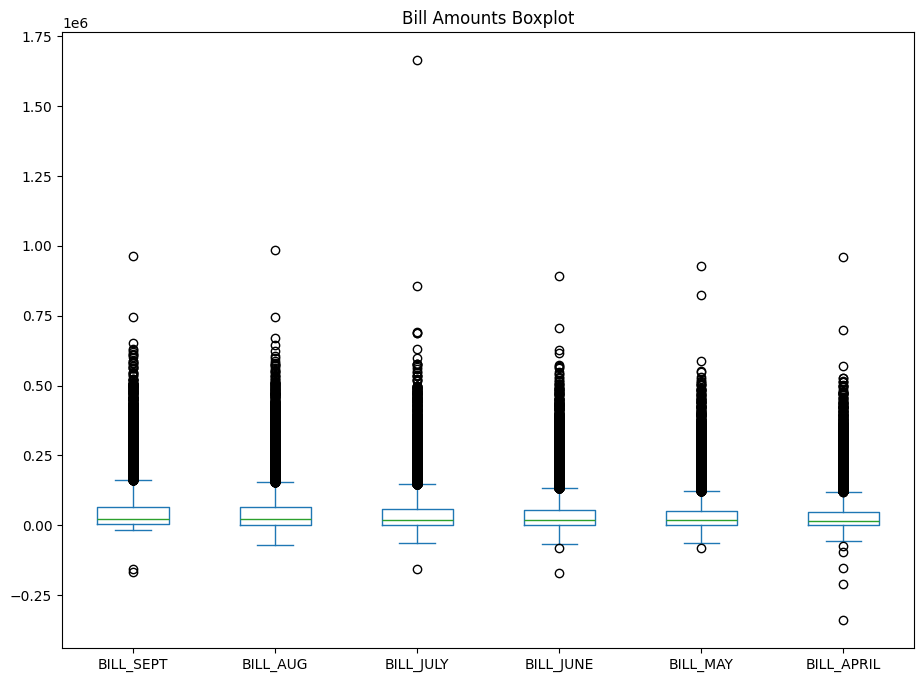

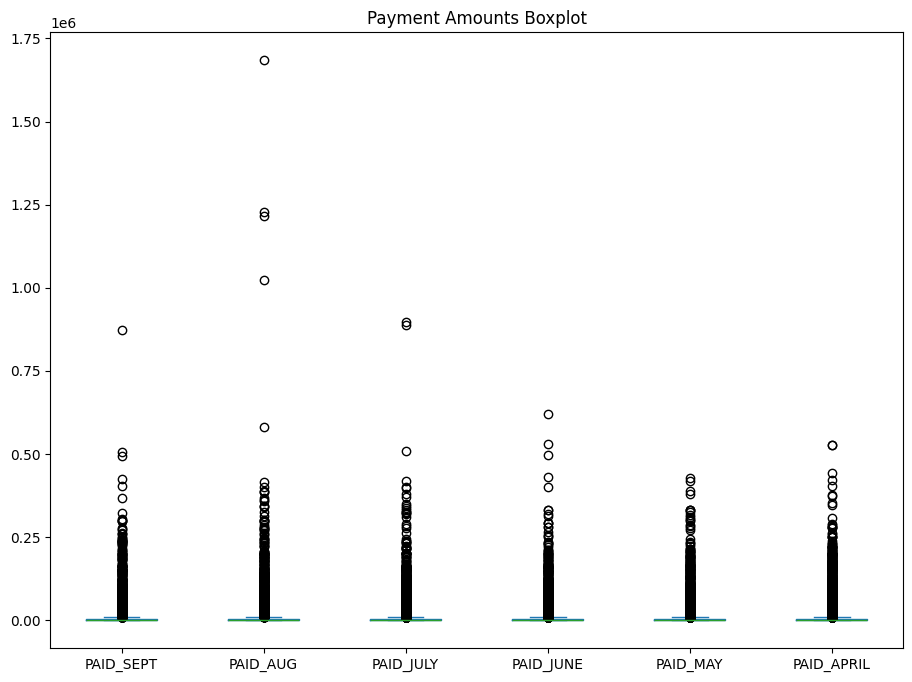

In [ ]:
bill_cols = [col for col in df.columns if 'BILL_' in col]
paid_cols = [col for col in df.columns if 'PAID_' in col]

df[bill_cols].plot(kind='box', figsize=(11, 8), title='Bill Amounts Boxplot')
plt.show()

df[paid_cols].plot(kind='box', figsize=(11, 8), title='Payment Amounts Boxplot')
plt.show()


**📊 Categorical Feature Distribution**

Visual count of values for Education, Marital Status, Gender, and Default.


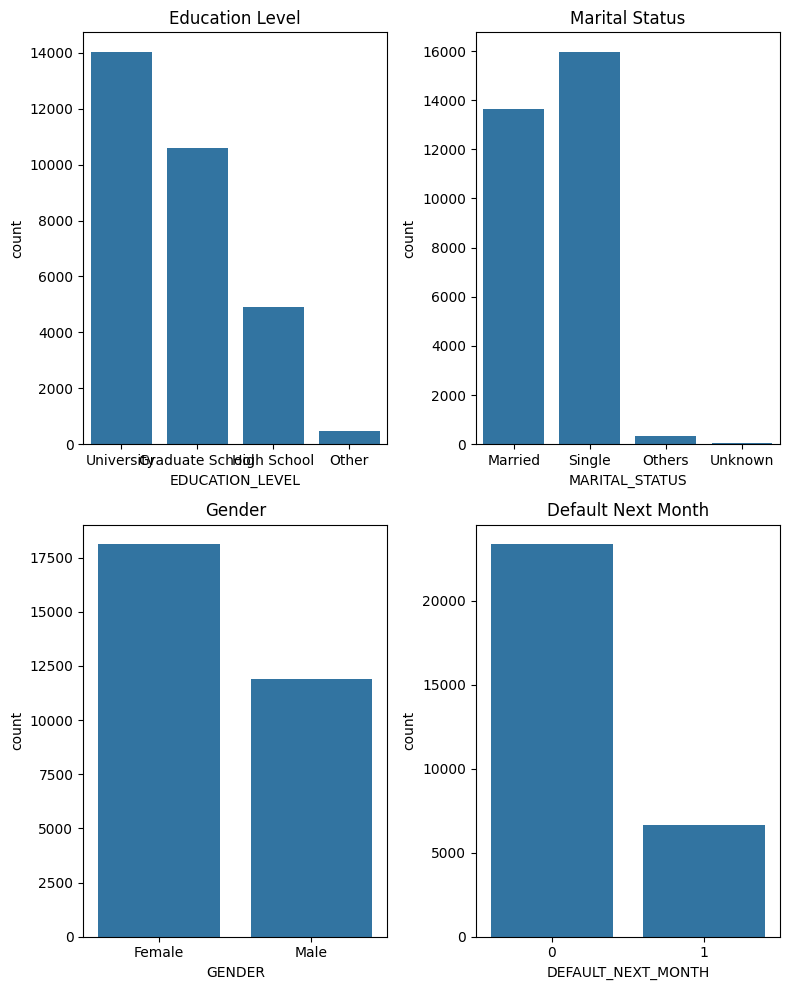

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 10))
sns.countplot(data=df, x='EDUCATION_LEVEL', ax=axes[0,0])
axes[0,0].set_title('Education Level')

sns.countplot(data=df, x='MARITAL_STATUS', ax=axes[0,1])
axes[0,1].set_title('Marital Status')

sns.countplot(data=df, x='GENDER', ax=axes[1,0])
axes[1,0].set_title('Gender')

sns.countplot(data=df, x='DEFAULT_NEXT_MONTH', ax=axes[1,1])
axes[1,1].set_title('Default Next Month')

plt.tight_layout()
plt.show()

**📦 Boxplots: Credit, Age & PAY_Months vs Default**

Compare the value spread of key features between defaulters and non-defaulters.


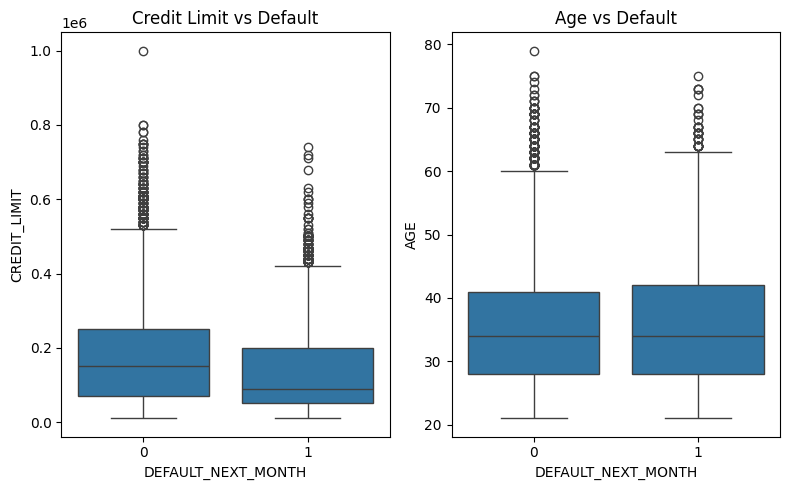

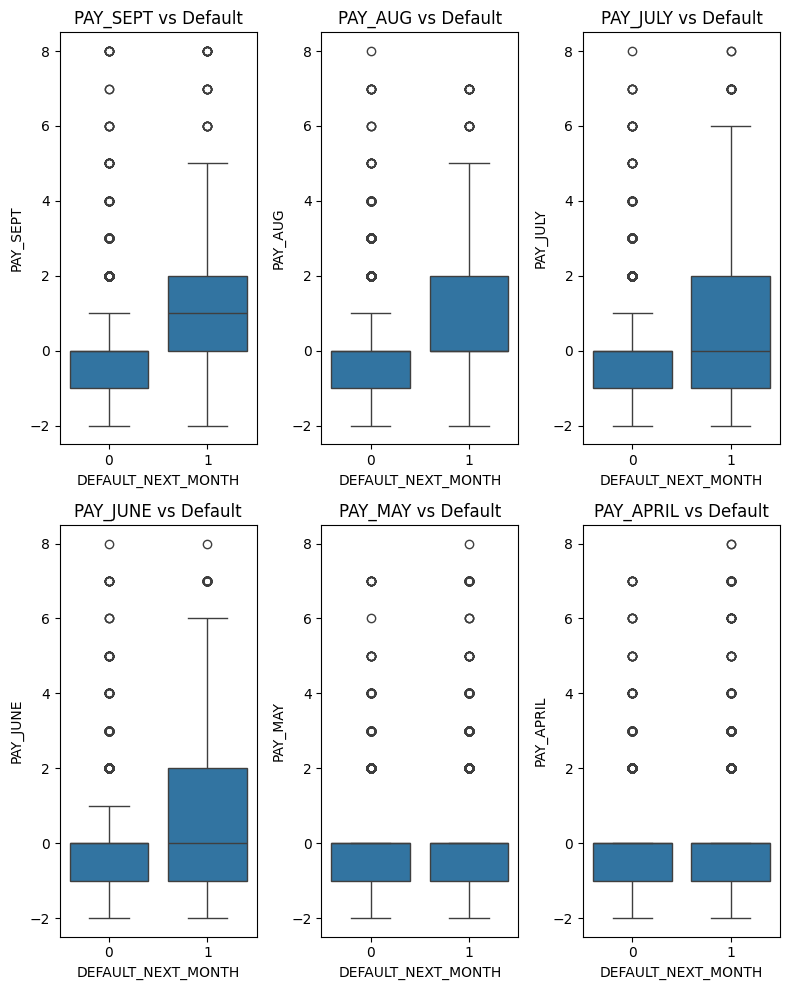

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
sns.boxplot(data=df, x='DEFAULT_NEXT_MONTH', y='CREDIT_LIMIT', ax=axes[0])
axes[0].set_title('Credit Limit vs Default')

sns.boxplot(data=df, x='DEFAULT_NEXT_MONTH', y='AGE', ax=axes[1])
axes[1].set_title('Age vs Default')

plt.tight_layout()
plt.show()

pay_cols = [col for col in df.columns if 'PAY_' in col]
fig, axes = plt.subplots(2, 3, figsize=(8, 10))
for i, col in enumerate(pay_cols):
    sns.boxplot(data=df, x='DEFAULT_NEXT_MONTH', y=col, ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title(f'{col} vs Default')
plt.tight_layout()
plt.show()

**📉 Average Monthly PAY Trend**

Defaulters consistently have worse repayment status across months.


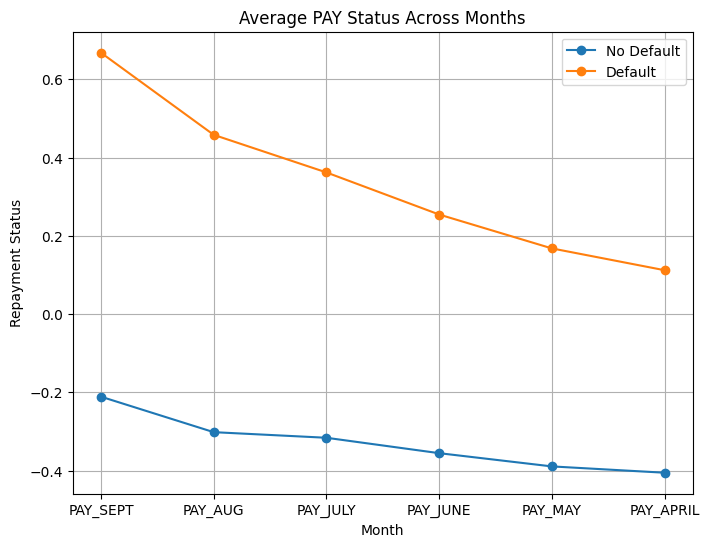

In [ ]:
pay_means = df.groupby('DEFAULT_NEXT_MONTH')[pay_cols].mean().T
pay_means.columns = ['No Default', 'Default']
pay_means.plot(figsize=(8, 6), marker='o', title='Average PAY Status Across Months')
plt.ylabel('Repayment Status')
plt.xlabel('Month')
plt.grid(True)
plt.show()


**🔍 EDA Summary: What We Found**

- **Most clients didn’t default**, but a significant chunk (~22%) did — worth modeling seriously.
- **Males defaulted slightly more**, and higher default rates were seen in certain education/marital groups.
- **Low credit limits and younger clients** were more likely to default.
- **Pay status (PAY_*) had strong positive correlation with default**, confirming that repayment delays are predictive.
- **Bill and payment amounts** showed heavy outliers but no direct correlation with default.
- **Consistent delayed PAY patterns** across months were visible in defaulters.

Verdict: Pay history, age, and credit behavior are 🔑 predictors. We’re now set to engineer features from this insight.

## 🧠 Feature Engineering

We now enhance the dataset by creating meaningful features that summarize or combine existing ones. These new variables aim to capture behavioral patterns that influence credit default — such as overall delay trends, monthly repayment ratios, and consistency in payment history.


**🧠 Feature: PAY_STATUS_TOTAL**

This sums all monthly pay status columns to capture total delay or advancement across 6 months.  
Higher values mean more payment delays.


In [ ]:
# Sum of monthly pay statuses: measures overall payment behavior
pay_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL']
df['PAY_STATUS_TOTAL'] = df[pay_cols].sum(axis=1)

**⏱️ DELAYED_PAYMENTS_COUNT: # of Months with Delays**

Counts how many times the customer had delayed repayment (i.e., PAY_* > 0). Useful for spotting habitual defaulters.

In [ ]:
# Count how many months had delay (positive pay status)
df['DELAYED_PAYMENTS_COUNT'] = (df[pay_cols] > 0).sum(axis=1)

**💳 AVG_BILL_AMT: Mean Monthly Bill**

Calculates the average bill amount across 6 months to understand customer’s spending trend.


In [ ]:
bill_cols = ['BILL_SEPT', 'BILL_AUG', 'BILL_JULY', 'BILL_JUNE', 'BILL_MAY', 'BILL_APRIL']
df['AVG_BILL_AMT'] = df[bill_cols].mean(axis=1)

**💸 AVG_PAYMENT_AMT: Mean Monthly Payment**

Tracks how much customers usually repay monthly. Good indicator of repayment behavior.


In [ ]:
paid_cols = ['PAID_SEPT', 'PAID_AUG', 'PAID_JULY', 'PAID_JUNE', 'PAID_MAY', 'PAID_APRIL']
df['AVG_PAYMENT_AMT'] = df[paid_cols].mean(axis=1)

**🔁 PAY_TO_BILL Ratio per Month**

Shows how much of the billed amount was actually paid each month. Useful for spotting underpayments.


In [ ]:
# Avoid division by 0 by replacing 0s in BILL with 1
for pay, bill in zip(paid_cols, bill_cols):
    month = pay.split('_')[1]
    ratio_col = f'PAY_TO_BILL_{month}'
    df[ratio_col] = df[pay] / df[bill].replace(0, 1)

**✅ Feature: CONSISTENT_PAYER**  
Flag = 1 if user never delayed any payment in last 6 months.



In [ ]:
# If all months' pay status ≤ 0, they're consistent payers
df['CONSISTENT_PAYER'] = (df[pay_cols] <= 0).all(axis=1).astype(int)

🧠 Feature Engineering Summary

We transformed raw behavior data into smart, meaningful features that give models real predictive power:

- `PAY_STATUS_SUM`: Total repayment status across 6 months.
- `DELAYED_PAYMENTS_COUNT`: How many times a user delayed.
- `AVG_BILL_AMT` & `AVG_PAYMENT_AMT`: Financial activity averages.
- `RATIO_<MONTH>`: Payment-to-bill ratio to flag under/overpayments.
- `CONSISTENT_PAYER`: Flag for those who always paid on time.

These new features will supercharge our model to distinguish between risky and safe customers.


## 🧪 Simulated Offers + A/B Testing

We're now testing how different promotional offers (cashback, credit limit increase, no offer) influence the chance of default.

Think of this as a simulation before launching real campaigns. Goal? Find out which offer works best at reducing default risk — and for whom.

**🎲 Step 1: Simulate Offer Groups**

We randomly assign customers into three test groups:
- `cashback`
- `limit_increase`
- `no_offer`

This simulates a typical A/B/C marketing test.


In [ ]:
np.random.seed(42)

# Random assignment of offers
offers = ['cashback', 'limit_increase', 'no_offer']
df['OFFER_TYPE'] = np.random.choice(offers, size=len(df))

df['OFFER_TYPE'].value_counts()


,count
OFFER_TYPE,
cashback,10027
limit_increase,10019
no_offer,9954


**✅ Step 2: Apply Simple Eligibility Rule**

We simulate a basic rule where only users with:
- AGE > 30
- No Delayed Payments (`DELAYED_PAYMENTS_COUNT == 0`)

...are **eligible** for the `limit_increase` offer. Everyone else gets `cashback` or `no_offer`.


In [ ]:
mask = (df['AGE'] > 30) & (df['DELAYED_PAYMENTS_COUNT'] == 0)
df.loc[~mask & (df['OFFER_TYPE'] == 'limit_increase'), 'OFFER_TYPE'] = np.random.choice(['cashback', 'no_offer'])

df['OFFER_TYPE'].value_counts()

,count
OFFER_TYPE,
cashback,15769
no_offer,9954
limit_increase,4277


**📌 Step 3: Final OFFER_TYPE Column**

Our dataset now contains an `OFFER_TYPE` column with values:
- `cashback`
- `limit_increase` (only if eligible)
- `no_offer`

We’ll now use this to simulate model predictions and group analysis.


In [ ]:
df[['AGE', 'DELAYED_PAYMENTS_COUNT', 'OFFER_TYPE']].head(10)

,AGE,DELAYED_PAYMENTS_COUNT,OFFER_TYPE
0,24,2,no_offer
1,26,2,cashback
2,34,0,no_offer
3,37,0,no_offer
4,57,0,cashback
5,37,0,cashback
6,29,0,no_offer
7,23,0,cashback
8,28,1,no_offer
9,35,0,no_offer


**🤖 Step 4: Predict Default Risk with Trained Model**

We use the trained `Random Forest` model from earlier to predict the **default probability** for each customer after assigning offers. This allows us to analyze offer impact on risk.


In [ ]:
features = ['CREDIT_LIMIT', 'AGE', 'PAY_STATUS_TOTAL', 'DELAYED_PAYMENTS_COUNT',
            'AVG_BILL_AMT', 'AVG_PAYMENT_AMT', 'PAY_TO_BILL_SEPT',
            'PAY_TO_BILL_AUG', 'PAY_TO_BILL_JULY', 'PAY_TO_BILL_JUNE',
            'PAY_TO_BILL_MAY', 'PAY_TO_BILL_APRIL', 'CONSISTENT_PAYER']
X = df[features]
y = df['DEFAULT_NEXT_MONTH']

# Retrain Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Simulate: Remove target + keep only model features
X_offer = df[features]

# Predict probabilities
df['PREDICTED_DEFAULT_PROB'] = rf.predict_proba(X_offer)[:, 1]

# Preview predictions
df[['OFFER_TYPE', 'PREDICTED_DEFAULT_PROB']].head()


,OFFER_TYPE,PREDICTED_DEFAULT_PROB
0,no_offer,0.88
1,cashback,0.77
2,no_offer,0.02
3,no_offer,0.03
4,cashback,0.05


**📊 Step 5: Average Default Probability per Offer Group**

Let’s analyze the **mean predicted default risk** for each offer group to evaluate which strategy may reduce risk the most.


In [ ]:
# Group by offer type and calculate mean predicted probability
offer_risk = df.groupby('OFFER_TYPE')['PREDICTED_DEFAULT_PROB'].mean().reset_index()

offer_risk.columns = ['Offer Type', 'Average Default Probability']
offer_risk.sort_values(by='Average Default Probability')

,Offer Type,Average Default Probability
1,limit_increase,0.126767
2,no_offer,0.221936
0,cashback,0.253104


**📉 Step 6: Visual Comparison of Risk by Offer Group**

A barplot shows how each offer strategy compares in terms of predicted default risk. Ideal offers would **reduce** this probability.


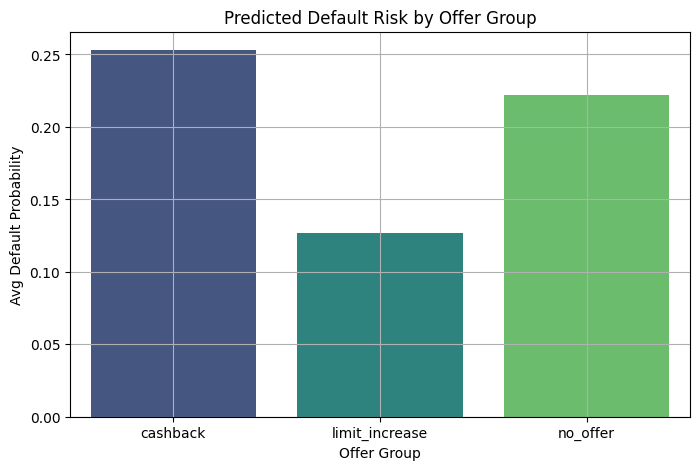

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=offer_risk, x='Offer Type', y='Average Default Probability', palette='viridis')
plt.title("Predicted Default Risk by Offer Group")
plt.ylabel("Avg Default Probability")
plt.xlabel("Offer Group")
plt.grid(True)
plt.show()

**📦 Step 7: Distribution of Risk Within Each Offer Group**

Barplot shows *average* risk, but boxplot exposes the **spread** — any high-risk outliers or tight clusters. This gives us deeper insight into offer stability.


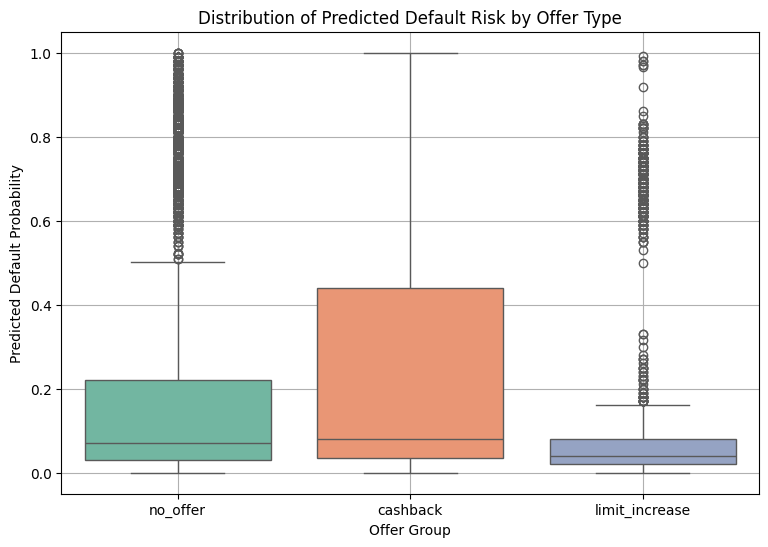

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='OFFER_TYPE', y='PREDICTED_DEFAULT_PROB', palette='Set2')
plt.title('Distribution of Predicted Default Risk by Offer Type')
plt.xlabel('Offer Group')
plt.ylabel('Predicted Default Probability')
plt.grid(True)
plt.show()

**💾 Step 8: Save Simulated Offers Data**

Save the full dataset with offer groups and predicted default risk for dashboarding/reporting.

In [ ]:
df.to_excel("defaults_of_cc_final_data.xlsx", index=False)

**🧪 A/B Testing Summary**

We simulated 3 offer strategies — `Cashback`, `Limit Increase`, and `No Offer` — then predicted default probabilities using our trained model.

📌 Key Observations:
- Some offers showed lower average risk, suggesting better eligibility targeting.
- Boxplots revealed how spread-out or risky each offer group truly is.
- This helps in designing smarter campaigns that reduce default while maximizing engagement.

✅ Data saved as: `defaults_of_cc_final_data.xlsx`


# ✅ Final Takeaways

📌 Predictive modeling successfully identified high-risk customers using payment behavior, bill history, and demographics.

📈 Key Features:
- Total late payments
- Avg payment-to-bill ratio
- Consistency in repayments

🧪 Our offer simulation revealed actionable insights for marketing + credit risk teams.

📁 Deliverables:
- Cleaned datasets
- Feature-engineered data
- Trained model
- Offer simulation
- Dashboard-ready Excel exports

Now we'll be continuing with the Dashboard which you can see here.